In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('twitter_.csv')

In [ ]:
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [ ]:
df.describe() # Me interesa que la desviacion sea grande. pa poder clusterizar

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40eae96490>,
      dtype=object)

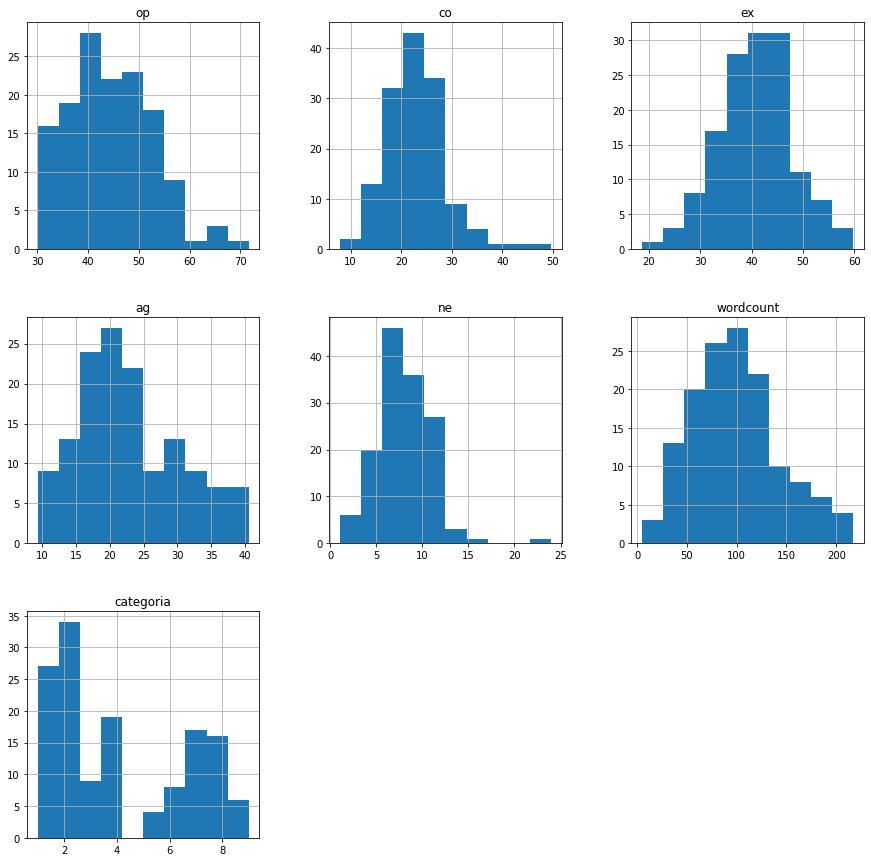

In [ ]:
df.hist(figsize = (15,15))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


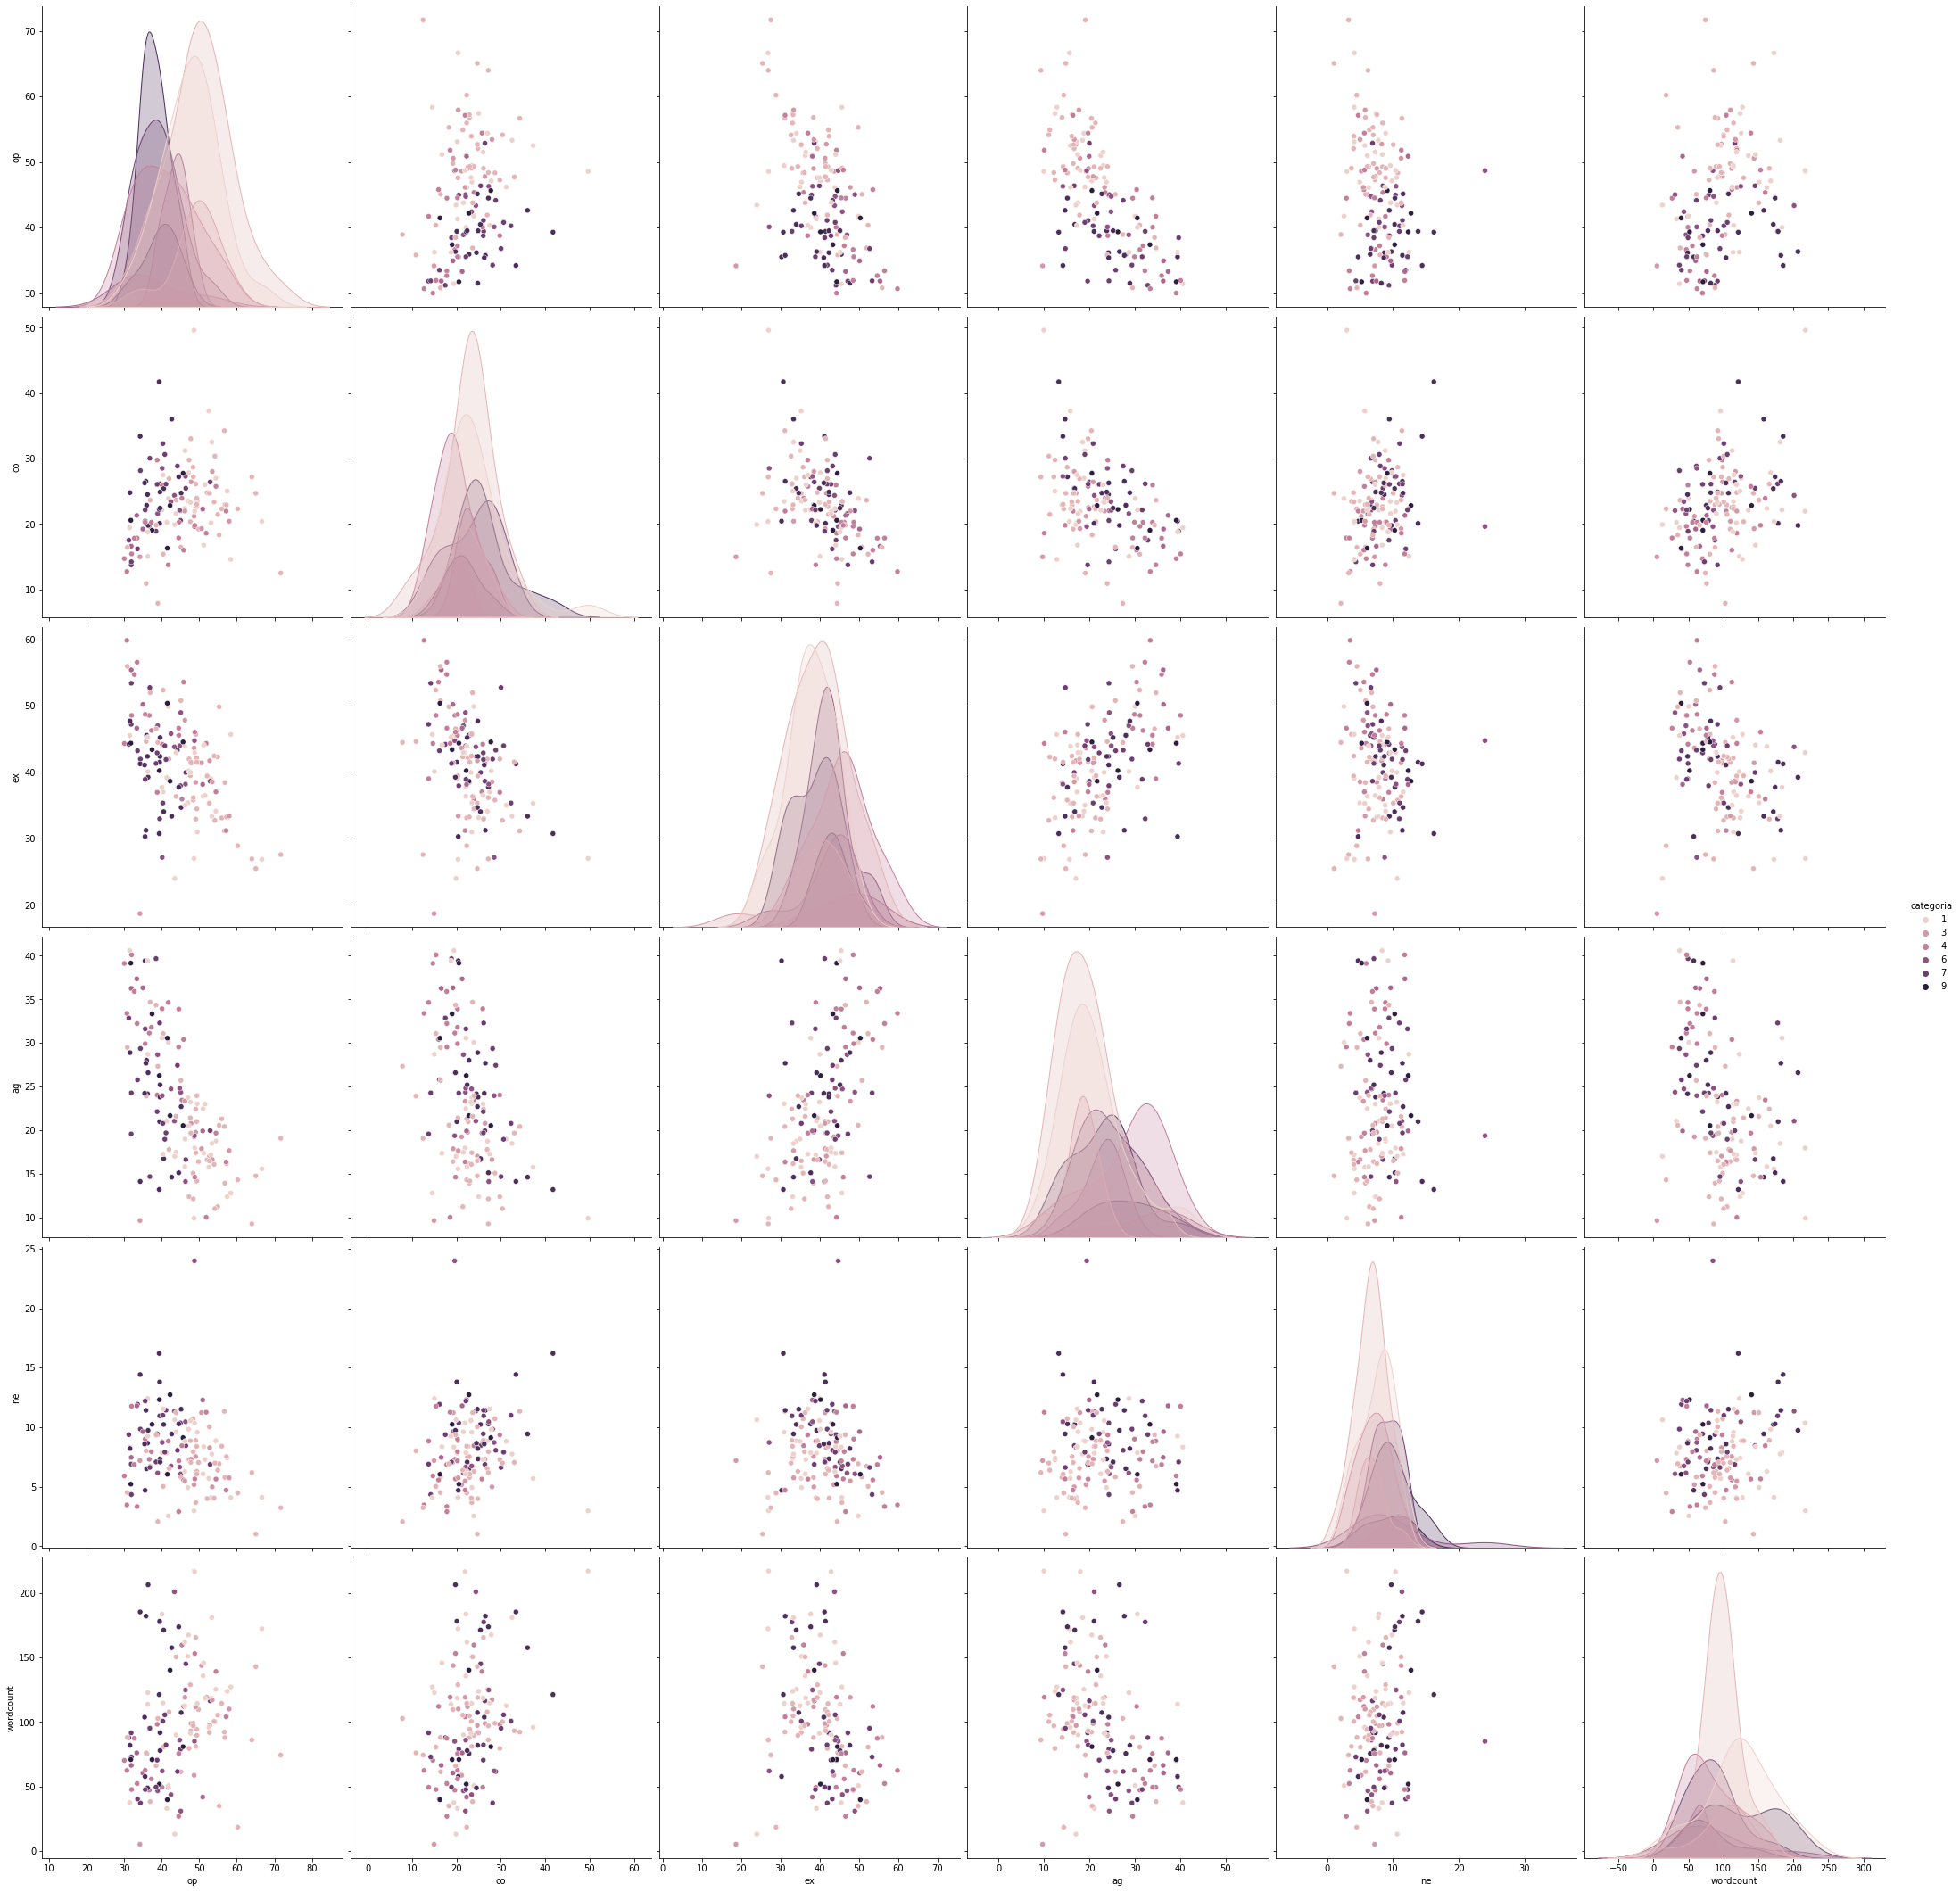

In [ ]:
sb.pairplot(df.dropna(),hue = 'categoria', size=5,vars= ['op','co','ex','ag','ne','wordcount'],kind= 'scatter')

In [ ]:
X= np.array(df[['op','co','ex','ag','ne','wordcount']])

In [ ]:
X.shape

(140, 6)

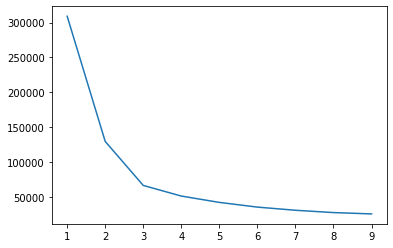

In [ ]:
val = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++')
  kmeans.fit(X)
  val.append(kmeans.inertia_)
plt.plot(range(1,10),val)

In [ ]:
import scipy.cluster.hierarchy as sch

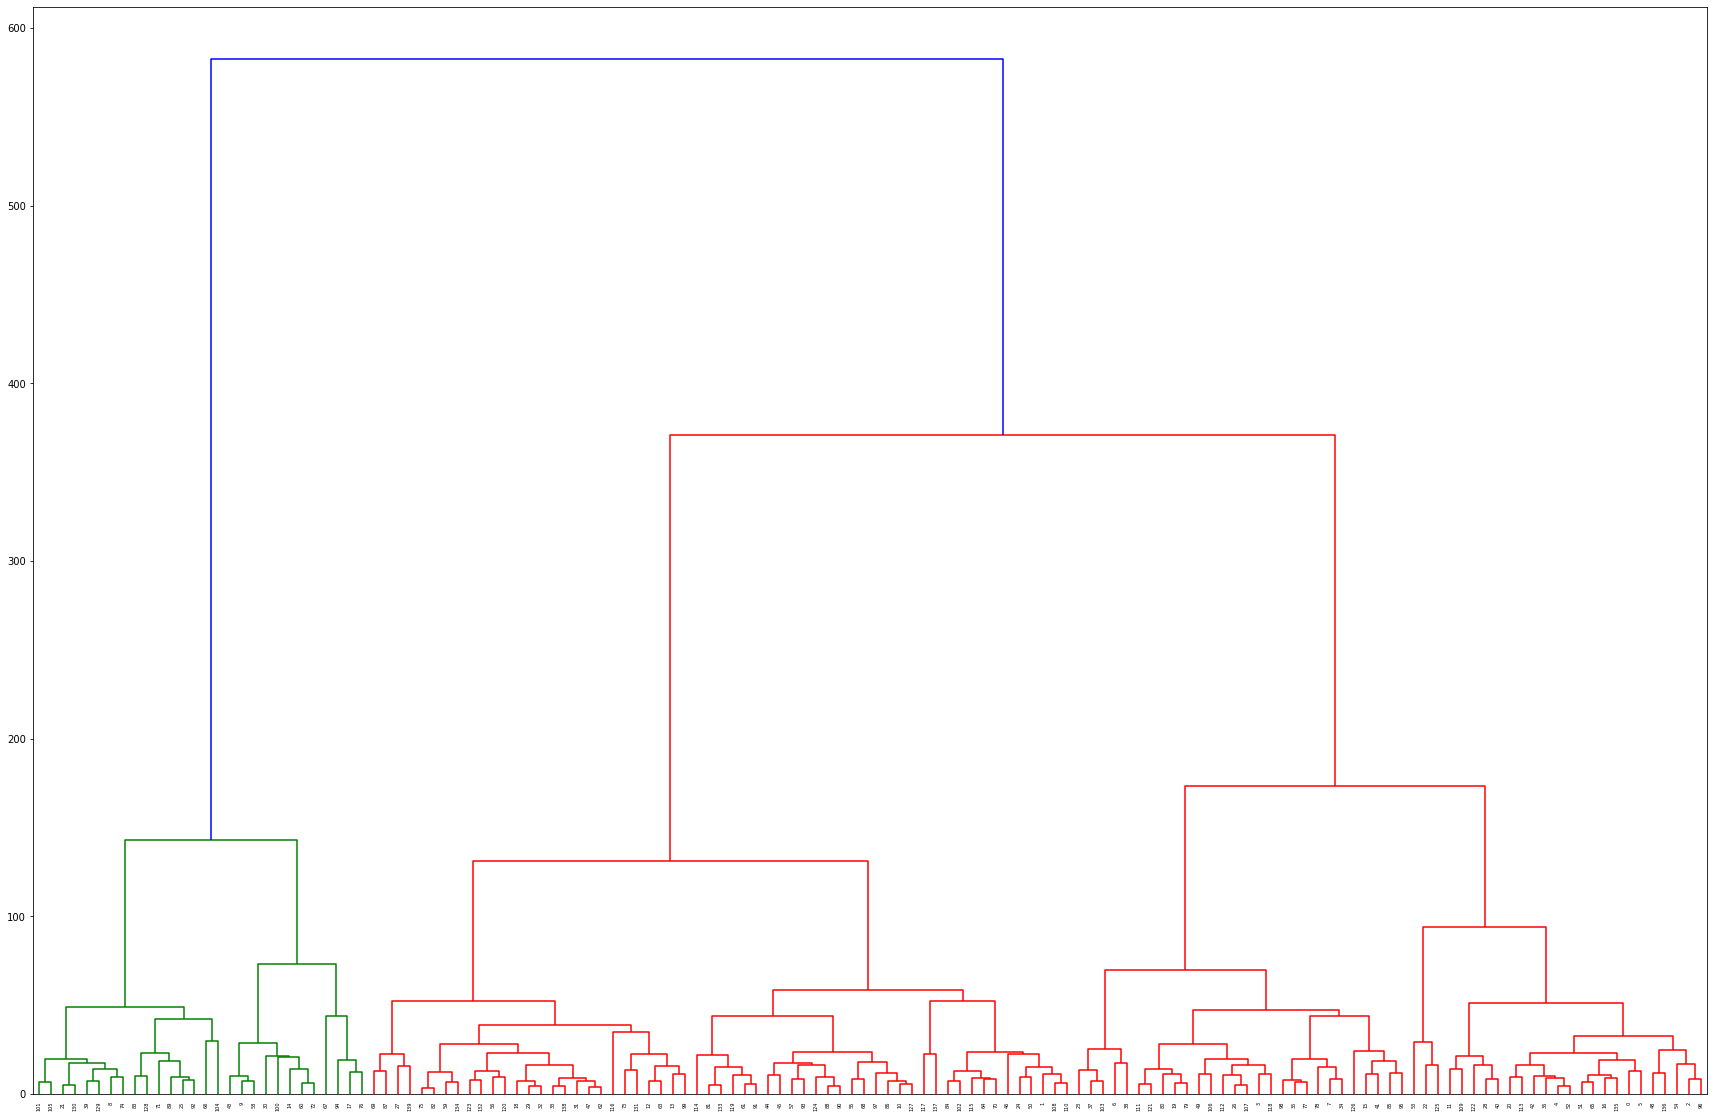

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))
sch.dendrogram(sch.linkage(X, method= 'ward', metric='euclidean'),ax=ax)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(X)

array([[ 17.26652486, 132.0573967 ,  66.57524949],
       [ 29.31620369,  89.5890666 ,  23.71571135],
       [ 10.45214002, 120.44385662,  55.52126856],
       [ 30.84156023,  90.53113752,  29.06090521],
       [  6.90145839, 122.65565368,  57.37390021],
       [ 14.15935513, 129.28420454,  63.84434464],
       [ 42.51133489,  79.51186843,  22.17386219],
       [ 21.53153229, 106.15460099,  45.05097539],
       [ 95.17516681,  23.36572013,  43.78327539],
       [126.92597915,  17.79846899,  77.83377715],
       [ 49.76911027,  71.30989884,   7.75677158],
       [ 20.89556598, 135.45380801,  69.01886109],
       [ 77.27819297,  43.63876793,  25.81564602],
       [ 78.52789507,  39.6965942 ,  27.62278615],
       [127.28174913,  15.04428599,  77.38922033],
       [ 15.90019978, 109.885671  ,  43.29194333],
       [  7.94553368, 120.05927555,  54.74615922],
       [150.0994907 ,  33.91515745,  99.72847016],
       [ 60.72968686,  59.16741632,  10.4699747 ],
       [ 23.73001513, 102.06184

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
centroides = kmeans.cluster_centers_

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

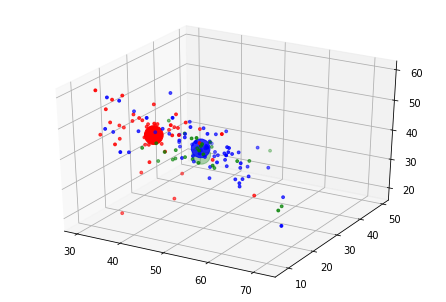

In [ ]:
colores = [ 'r', 'g', 'b']
asignacion= []
for row in y_pred:
  asignacion.append(colores[row])
  
fig = plt.figure()
ax= Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignacion, s=8)
ax.scatter(centroides[:,0],centroides[:,1],centroides[:,2],c=colores,marker='o',s=350)